# k-Means Clustering in Cars Data

## Import Libraries 

In [68]:
import pandas as pd
import numpy as np
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Load Cars Dataset

In [125]:
car_data = pd.read_csv("D:\\Datasets\\Cars Data\\cars.csv")
car_data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


# Plot the data
The X (mpg) and Y (cylinders) axes are the independent variables, while the colors of the points are their classes.

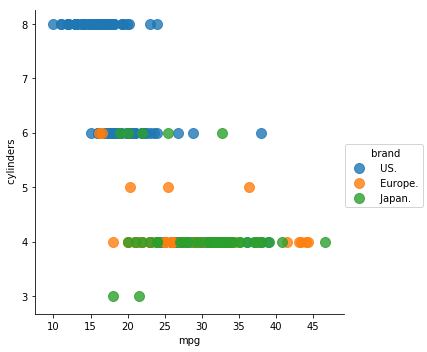

In [112]:
seaborn.lmplot('mpg', ' cylinders', data=car_data, fit_reg=False,hue=' brand', scatter_kws={"marker": "D","s": 100})

# Checking Data Types

In [113]:
car_data.dtypes

mpg             float64
 cylinders        int64
 cubicinches     object
 hp               int64
 weightlbs       object
 time-to-60       int64
 year             int64
 brand           object
dtype: object

# Transforming Variables 
We need to convert the object variables into numeric variable before considering the data for the KMeans model

## Using pandas.to_numeric function we are converting the object to numeric variables 

In [114]:
car_data[' cubicinches'] = pd.to_numeric(car_data[' cubicinches'], errors='coerce')
car_data[' weightlbs'] = pd.to_numeric(car_data[' weightlbs'], errors='coerce')

## Create a function that converts all values of car_data[' brand'] into numbers

In [115]:
def brand_to_numeric(x):
    if x==' Japan.':
        return 3
    if x==' Europe.':
        return 2
    if x==' US.':
        return 1

## Apply the function to the brand variable

In [116]:
car_data[' brand'] = car_data[' brand'].apply(brand_to_numeric)
car_data[' brand'].head()

0    1
1    2
2    1
3    1
4    1
Name:  brand, dtype: int64

### Checking the Transformed values

In [117]:
car_data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,1
1,31.9,4,89.0,71,1925.0,14,1980,2
2,17.0,8,302.0,140,3449.0,11,1971,1
3,15.0,8,400.0,150,3761.0,10,1971,1
4,30.5,4,98.0,63,2051.0,17,1978,1


In [118]:
# Checking datatype of the data
car_data.dtypes

mpg             float64
 cylinders        int64
 cubicinches    float64
 hp               int64
 weightlbs      float64
 time-to-60       int64
 year             int64
 brand            int64
dtype: object

# Treating Missing Data
We need to treat missing values before considering the data for the KMeans model. 

##### Using  pandas.DataFrame.fillna with the method='ffill' option. Using ffill is extremely common so that the “last known value” is available at every time point. 'ffill' stands for 'forward fill' and will propagate last valid observation forward. The alternative is 'bfill' which works the same way, but backwards. 

In [119]:
car_data = car_data.fillna(method='ffill')

# Spliting Predictor Variable

In [120]:
predictor = car_data.iloc[:, car_data.columns != ' brand']

In [121]:
#Let us now split the dataset into train & test
from sklearn.cross_validation import train_test_split
x_train,x_test = train_test_split(predictor, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)

x_train  (182, 7)
x_test  (79, 7)


In [122]:
# K# Create k-mean object
clt = KMeans(n_clusters=3, random_state=0, n_jobs=-1)

# Train model
model = clt.fit(x_train)

In [123]:
# View predict class
model.labels_

array([0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 1, 1, 0, 2, 2,
       1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0,
       1, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 1,
       1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 2,
       0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1, 2, 0, 2, 1, 1,
       2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2])

# Predict Observation’s Cluster

In [124]:
# Predict observation's cluster
model.predict(x_test)

array([2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 0, 2,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2,
       2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1,
       1, 2, 2, 2, 0, 0, 2, 1, 0, 2])

# View Centers Of Each Cluster

In [100]:
# View cluster centers
model.cluster_centers_

array([[  1.42941176e+01,   7.88235294e+00,   3.58529412e+02,
          1.63764706e+02,   4.33061765e+03,   1.31470588e+01,
          1.97479412e+03],
       [  2.89224719e+01,   4.11235955e+00,   1.11337079e+02,
          7.79662921e+01,   2.24966292e+03,   1.64269663e+01,
          1.97766292e+03],
       [  1.91135593e+01,   6.44067797e+00,   2.41762712e+02,
          1.14966102e+02,   3.34532203e+03,   1.53898305e+01,
          1.97642373e+03]])

# Elbow Method

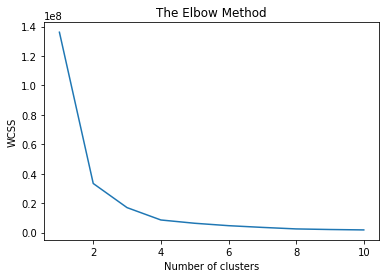

In [101]:
# Creating a funtion with KMeans to plot "The Elbow Method"
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters is 4.

In [140]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=150,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(predictor)

# Visualising the Clusters

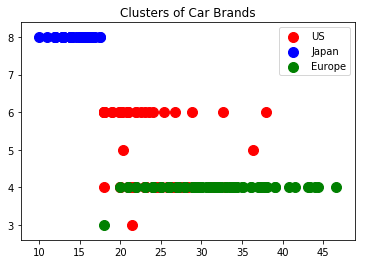

In [143]:
X = predictor.as_matrix(columns=None)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='US')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='Japan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='Europe')
plt.title('Clusters of Car Brands')
plt.legend()
plt.show()

From the above graph we can observe that K-means is able to cluster most of the cars in their respective brands.